# Classification 예시

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

### 와인 등급 분류데이터


**Data Set Characteristics:**  

    :Number of Instances: 178

    :Number of Attributes: 13

    :Attribute Information (in order):
        - Alcohol    
        - Malic acid      
        - Ash
        - Alcalinity of ash
        - Megnesium
        - Total phenols
        - Flavanoids
        - Nonflavonoid phenols
        - Proanthocyanins
        - Color intensity
        - Hue
        - OD280/OD315 of diluted wines
        - Proline
      - class:
        - class_0
        - class_1
        - class_2

In [2]:
from sklearn.datasets import load_wine

dataset = load_wine()
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)
dataframe['target'] = dataset.target

In [3]:
dataframe.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [4]:
dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
from sklearn.model_selection import train_test_split

X = dataframe.loc[:,dataframe.columns != 'target']
y = dataframe['target']
#train = 0.8, test 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [68]:
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)

In [69]:
np.array(y_test).shape

(36,)

In [70]:
from sklearn.metrics import confusion_matrix

confusion_df = pd.DataFrame(confusion_matrix(y_test, lr_y_pred), columns=["0", "1", "2"], index=["0", "1", "2"])
confusion_df

,0,1,2
0,9,1,0
1,1,14,2
2,0,0,9


In [71]:
lr_y_pred

array([1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1])

In [72]:
# accuracy, precision, recall, f1-score 출력
# "macro"는 다중분류 모델 평가를 위해 각 레이블에 대한 metric 값을 계산 후 평균 점수를 내주게 함
from sklearn import metrics

print(" logistic regression accuracy: {:.4f}".format(metrics.accuracy_score(y_test,lr_y_pred)))
print(" logistic regression precision: {:.4f}".format(metrics.precision_score(y_test,lr_y_pred,average="macro")))
print(" logistic regression recall: {:.4f}".format(metrics.recall_score(y_test,lr_y_pred,average="macro")))
print(" logistic regression f1 score: {:.4f}".format(metrics.f1_score(y_test,lr_y_pred,average="macro")))

 logistic regression accuracy: 0.8889
 logistic regression precision: 0.8838
 logistic regression recall: 0.9078
 logistic regression f1 score: 0.8917


In [20]:
# 가중치와 절편
print(lr.coef_, lr.intercept_)

[[ 0.15515775  0.19741607  0.11482201 -0.42363336 -0.04885314  0.20568173
   0.42676865 -0.03012155  0.0824182   0.15976373  0.01503716  0.36196558
   0.01021876]
 [ 0.19945175 -0.71239742 -0.111986    0.31225016  0.02139443  0.20056056
   0.38237491  0.01783484  0.25850235 -1.36596515  0.22605636  0.39888028
  -0.00732183]
 [-0.3546095   0.51498135 -0.00283601  0.1113832   0.0274587  -0.40624229
  -0.80914356  0.01228672 -0.34092055  1.20620142 -0.24109353 -0.76084586
  -0.00289693]] [-0.01662092  0.06761161 -0.05099069]


In [94]:
np.where(y_test != 0, 1, 0)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

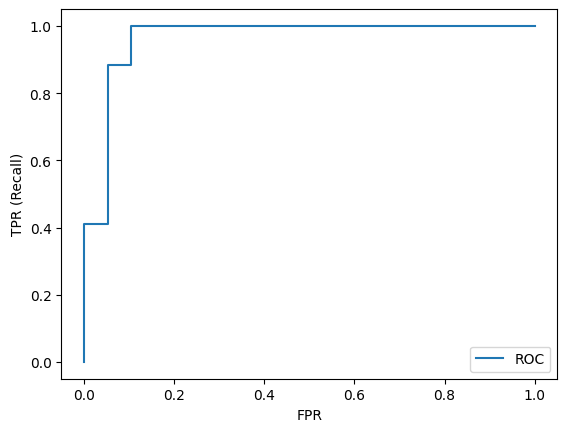

In [98]:
# ROC
from sklearn.metrics import roc_curve

# Label 1에 대한 ROC_curve 계산 (레이블 1이 아닌 나머지는 모두 0으로 처리)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(np.where(y_test != 1, 0, 1), lr.predict_proba(X_test)[:,1])

plt.plot(fpr_rf, tpr_rf, label="ROC")
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

plt.legend(loc=4)

### Scaling 처리 후 학습 진행

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #평균을 0, 분산을 1로 조정해주는 scaler
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [41]:
# feature 마다의 값의 차이가 많이 나서 scaling을 하는 것이 좋은 결과가 남
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2"], index=["0", "1", "2"])
confusion_df

,0,1,2
0,10,0,0
1,0,16,1
2,0,0,9


In [42]:
# accuracy, precision, recall, f1-score 출력
# "macro"는 다중분류 모델 평가를 위해 각 레이블에 대한 metric 값을 계산 후 평균 점수를 내주게 함
from sklearn import metrics

print(" logistic regression(with Scaling) accuracy: {:.4f}".format(metrics.accuracy_score(y_test,y_pred)))
print(" logistic regression(with Scaling) precision: {:.4f}".format(metrics.precision_score(y_test,y_pred,average="macro")))
print(" logistic regression(with Scaling) recall: {:.4f}".format(metrics.recall_score(y_test,y_pred,average="macro")))
print(" logistic regression(with Scaling) f1 score: {:.4f}".format(metrics.f1_score(y_test,y_pred,average="macro")))

 logistic regression(with Scaling) accuracy: 0.9722
 logistic regression(with Scaling) precision: 0.9667
 logistic regression(with Scaling) recall: 0.9804
 logistic regression(with Scaling) f1 score: 0.9724


## DecisionTree

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth =  5)

In [64]:
dt.fit(X_train,y_train)
y_pred  = dt.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2"], index=["0", "1", "2"])
confusion_df

,0,1,2
0,8,2,0
1,0,15,2
2,0,0,9


In [66]:
# accuracy, precision, recall, f1-score 출력
# "macro"는 다중분류 모델 평가를 위해 각 레이블에 대한 metric 값을 계산 후 평균 점수를 내주게 함
from sklearn import metrics

print(" Decision Tree accuracy: {:.4f}".format(metrics.accuracy_score(y_test,y_pred)))
print(" Decision Tree precision: {:.4f}".format(metrics.precision_score(y_test,y_pred,average="macro")))
print(" Decision Tree recall: {:.4f}".format(metrics.recall_score(y_test,y_pred,average="macro")))
print(" Decision Tree f1 score: {:.4f}".format(metrics.f1_score(y_test,y_pred,average="macro")))

 Decision Tree accuracy: 0.8889
 Decision Tree precision: 0.9002
 Decision Tree recall: 0.8941
 Decision Tree f1 score: 0.8904


### Scaling 처리 후 학습 진행

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #평균을 0, 분산을 1로 조정해주는 scaler
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
dt.fit(X_train_scaled,y_train)
y_pred  = dt.predict(X_test_scaled)

In [61]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2"], index=["0", "1", "2"])
confusion_df

,0,1,2
0,8,2,0
1,0,15,2
2,0,0,9


In [62]:
# accuracy, precision, recall, f1-score 출력
# "macro"는 다중분류 모델 평가를 위해 각 레이블에 대한 metric 값을 계산 후 평균 점수를 내주게 함
from sklearn import metrics

print(" Decision Tree(with Scaling) accuracy: {:.4f}".format(metrics.accuracy_score(y_test,y_pred)))
print(" Decision Tree(with Scaling) precision: {:.4f}".format(metrics.precision_score(y_test,y_pred,average="macro")))
print(" Decision Tree(with Scaling) recall: {:.4f}".format(metrics.recall_score(y_test,y_pred,average="macro")))
print(" Decision Tree(with Scaling) f1 score: {:.4f}".format(metrics.f1_score(y_test,y_pred,average="macro")))

 Decision Tree(with Scaling) accuracy: 0.8889
 Decision Tree(with Scaling) precision: 0.9002
 Decision Tree(with Scaling) recall: 0.8941
 Decision Tree(with Scaling) f1 score: 0.8904


### Depth를 다르게 주어 진행

In [56]:
dt_general = DecisionTreeClassifier(max_depth =  2)

dt_general.fit(X_train,y_train)
y_pred  = dt_general.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2"], index=["0", "1", "2"])
confusion_df

,0,1,2
0,9,1,0
1,3,12,2
2,0,0,9


In [58]:
# accuracy, precision, recall, f1-score 출력
# "macro"는 다중분류 모델 평가를 위해 각 레이블에 대한 metric 값을 계산 후 평균 점수를 내주게 함
from sklearn import metrics

print(" Decision Tree(depth=2) accuracy: {:.4f}".format(metrics.accuracy_score(y_test,y_pred)))
print(" Decision Tree(depth=2) precision: {:.4f}".format(metrics.precision_score(y_test,y_pred,average="macro")))
print(" Decision Tree(depth=2) recall: {:.4f}".format(metrics.recall_score(y_test,y_pred,average="macro")))
print(" Decision Tree(depth=2) f1 score: {:.4f}".format(metrics.f1_score(y_test,y_pred,average="macro")))

 Decision Tree(depth=2) accuracy: 0.8333
 Decision Tree(depth=2) precision: 0.8304
 Decision Tree(depth=2) recall: 0.8686
 Decision Tree(depth=2) f1 score: 0.8394


### Random Forest

In [51]:
# decision Tree의 overfitting 단점을 보완한 앙상블 학습 기법
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
#n_estimator = 랜덤포레스트 안의 결정트리 갯수
#max_depth = 최대 깊이

In [52]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix

confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["0", "1", "2"], index=["0", "1", "2"])
confusion_df

,0,1,2
0,10,0,0
1,0,16,1
2,0,0,9


In [55]:
# accuracy, precision, recall, f1-score 출력
# "macro"는 다중분류 모델 평가를 위해 각 레이블에 대한 metric 값을 계산 후 평균 점수를 내주게 함
from sklearn import metrics

print(" Random Forest accuracy: {:.4f}".format(metrics.accuracy_score(y_test,y_pred)))
print(" Random Forest precision: {:.4f}".format(metrics.precision_score(y_test,y_pred,average="macro")))
print(" Random Forest recall: {:.4f}".format(metrics.recall_score(y_test,y_pred,average="macro")))
print(" Random Forest f1 score: {:.4f}".format(metrics.f1_score(y_test,y_pred,average="macro")))

 Random Forest accuracy: 0.9722
 Random Forest precision: 0.9667
 Random Forest recall: 0.9804
 Random Forest f1 score: 0.9724
